In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [5]:
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Stock price analysis 2019

In [6]:
stock_list=[]

for stock in ['ADPL_2019.csv','ADRS_2019.csv','ARNT_2019.csv','ATGR_2019.csv','ATPL_2019.csv','ERNT_2019.csv','HT-2019.csv','KOEI_2019.csv','PODR_2019.csv','RIVP_2019.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
243
206
231
239
238
247
194
243
247


In [7]:
df = pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

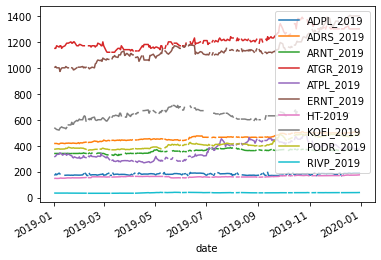

In [8]:
df.plot() #wo filled data

In [42]:
df.fillna(method='ffill')#with filled data

,ADPL_2019,ADRS_2019,ARNT_2019,ATGR_2019,ATPL_2019,ERNT_2019,HT-2019,KOEI_2019,PODR_2019,RIVP_2019
date,,,,,,,,,,
2019-01-02,174.5,417.0,340.0,1150.0,316.0,1005.0,148.0,535.0,373.0,34.8
2019-01-03,183.0,417.0,340.0,1150.0,320.0,1010.0,148.5,530.0,374.0,35.0
2019-01-04,175.5,417.0,340.0,1170.0,332.0,1000.0,147.5,525.0,375.0,34.6
2019-01-07,188.5,412.0,340.0,1160.0,334.0,1000.0,148.0,520.0,376.0,34.4
2019-01-08,182.0,417.0,340.0,1170.0,345.0,972.0,149.5,535.0,373.0,34.4
...,...,...,...,...,...,...,...,...,...,...
2019-12-19,191.0,498.0,368.0,1300.0,381.0,1405.0,172.5,650.0,471.0,38.2
2019-12-20,186.0,497.0,368.0,1300.0,385.0,1400.0,172.5,650.0,471.0,38.1
2019-12-23,191.0,504.0,378.0,1300.0,381.0,1400.0,173.0,650.0,479.0,38.4


<AxesSubplot:xlabel='date'>

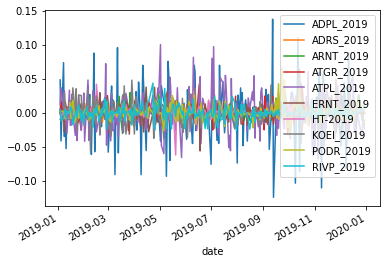

In [10]:
returns19=df.pct_change()
returns19.plot()

In [13]:
volatility19=df.pct_change().std()
volatility19.to_frame()#.plot(kind='scatter')

,0
ADPL_2019,0.032392
ADRS_2019,0.006000
ARNT_2019,0.008304
ATGR_2019,0.011234
ATPL_2019,0.026523
ERNT_2019,0.010982
HT-2019,0.007184
KOEI_2019,0.014721
PODR_2019,0.010304
RIVP_2019,0.009623


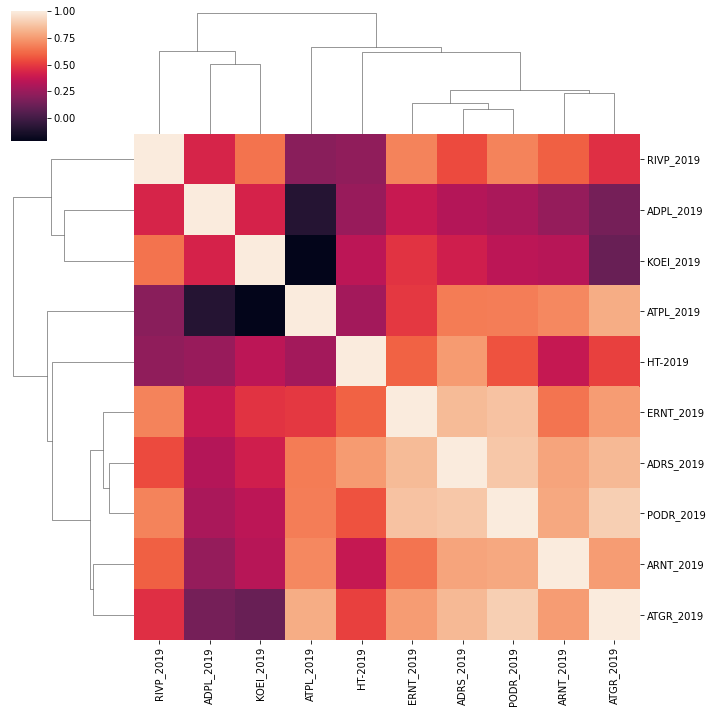

In [14]:
sns.clustermap(df.corr(method='spearman'))

# Beta calculation 2019

In [54]:
CROBEX_2019=pd.read_csv('CROBEX-2019.csv',delimiter=';', decimal=',')
CROBEX10_2019=pd.read_csv('CROBEX10-2019.csv',delimiter=';', decimal=',')#još dodaj german bonds

In [ ]:
#probala sam sredit dates ali to nije uspjelo

In [44]:
returns=df.pct_change().dropna()

In [55]:
CROBEX_2019['date'] = pd.to_datetime(CROBEX_2019['date'])
CROBEX_2019= CROBEX_2019.set_index('date')
CROBEX_2019= CROBEX_2019.sort_index()

In [56]:
CROBEX10_2019['date'] = pd.to_datetime(CROBEX10_2019['date'])
CROBEX10_2019 = CROBEX10_2019.set_index('date')
CROBEX10_2019= CROBEX10_2019.sort_index()

In [59]:
X = returns[['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019','KOEI_2019','PODR_2019','RIVP_2019']]
y = CROBEX_2019['last_value']#sad imam previse returnsa
model = LinearRegression()
model.fit(X,y)
model.coef_ 

ValueError: Found input variables with inconsistent numbers of samples: [275, 247]

In [60]:
X = returns[['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019','KOEI_2019','PODR_2019','RIVP_2019']]
y = CROBEX10_2019['last_value']
model = LinearRegression()
model.fit(X,y)
model.coef_ 

ValueError: Found input variables with inconsistent numbers of samples: [275, 247]

In [ ]:
#X = returns[['ADPL_2019','ADRS_2019','ARNT_2019','ATGR_2019','ATPL_2019','ERNT_2019','HT-2019','KOEI_2019','PODR_2019','RIVP_2019']]
#y = german goerment bond prices
#model = LinearRegression()
#model.fit(X,y)
#model.coef_ 

In [ ]:
#portfolio beta za sva tri slučaja

# Stock price analysis 2021

In [68]:
stock_list=[]

for stock in ['ADPL_2021.csv','ADRS_2021.csv','ARNT_2021.csv','ATGR_2021.csv','ATPL_2021.csv','ERNT_2021.csv','HT-2021.csv','KOEI_2021.csv','PODR_2021.csv','RIVP_2021.csv']:
    df_tmp = pd.read_csv(stock, delimiter=';', decimal=',')
    df_tmp['date'] = pd.to_datetime(df_tmp['date'])
    df_tmp = df_tmp.set_index('date')
    df_tmp = df_tmp.sort_index()
    df_tmp = df_tmp['last_price'].to_frame().rename(columns={'last_price':stock[:-4]})
    
    print(len(df_tmp))
    
    stock_list.append(df_tmp)
    

244
246
202
232
249
247
250
198
246
250


In [13]:
df = pd.concat(stock_list, axis=1)

<AxesSubplot:xlabel='date'>

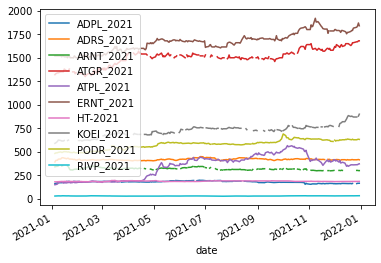

In [14]:
df.plot()#wo filled data

<AxesSubplot:xlabel='date'>

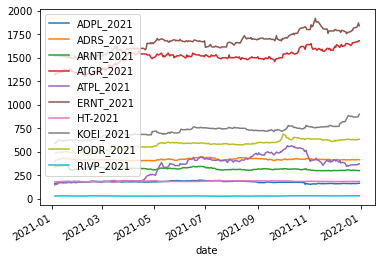

In [15]:
df.fillna(method='ffill').plot()

<AxesSubplot:xlabel='date'>

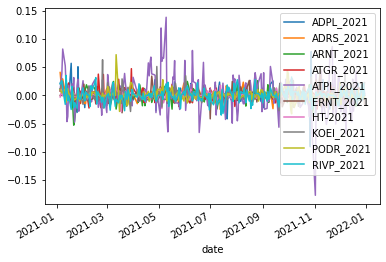

In [25]:
returns21=df.pct_change() #uredit labels
returns21.plot()

<AxesSubplot:>

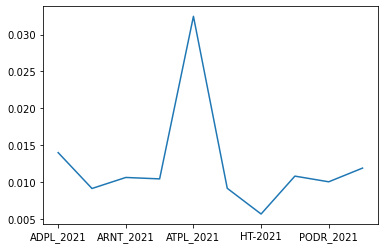

In [26]:
volatility21=df.pct_change().std()
volatility21.plot()

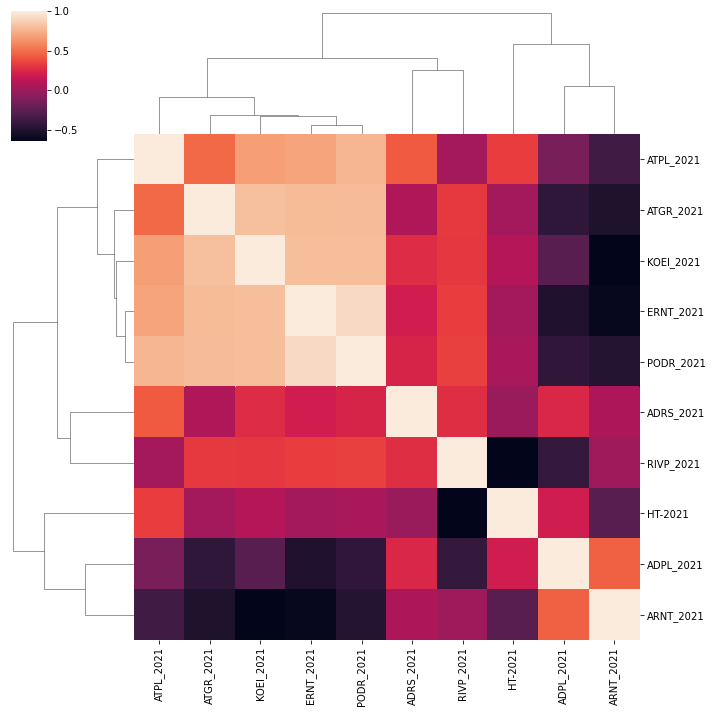

In [16]:
sns.clustermap(df.corr(method='spearman'))

# Beta calculation 2021


In [65]:
CROBEX_2021=pd.read_csv('CROBEX-2021.csv',delimiter=';', decimal=',')
CROBEX10_2021=pd.read_csv('CROBEX10-2021.csv',delimiter=';', decimal=',')#još dodaj german bonds

In [66]:
CROBEX_2021['date'] = pd.to_datetime(CROBEX_2021['date'])
CROBEX_2021 = CROBEX_2021.set_index('date')
CROBEX_2021= CROBEX_2021.sort_index()
CROBEX_2021.head()

,mic,symbol,isin,open_value,high_value,low_value,last_value,change_prev_close_percentage,turnover
date,,,,,,,,,
2021-01-02,XZAG,CBX,HRZB00ICBEX6,1787.19,1795.21,1785.02,1793.10,0.38,3208175.14
2021-01-03,XZAG,CBX,HRZB00ICBEX6,1830.19,1835.72,1828.24,1829.88,-0.02,2681397.76
2021-01-04,XZAG,CBX,HRZB00ICBEX6,1872.22,1880.43,1872.08,1876.58,0.23,3546018.80
2021-01-06,XZAG,CBX,HRZB00ICBEX6,1933.86,1945.33,1933.86,1944.66,0.61,2954010.58
2021-01-07,XZAG,CBX,HRZB00ICBEX6,1982.71,1982.71,1958.28,1971.32,-0.46,7534773.84


In [67]:
CROBEX10_2021['date'] = pd.to_datetime(CROBEX10_2021['date'])
CROBEX10_2021 = CROBEX10_2021.set_index('date')
CROBEX10_2021= CROBEX10_2021.sort_index()
CROBEX10_2021.head()

,mic,symbol,isin,open_value,high_value,low_value,last_value,change_prev_close_percentage,turnover
date,,,,,,,,,
2021-01-02,XZAG,CBX10,HRZB00ICBE11,1117.06,1122.59,1117.06,1120.53,0.42,2080121.40
2021-01-03,XZAG,CBX10,HRZB00ICBE11,1132.58,1137.36,1132.10,1136.37,0.34,1584212.00
2021-01-04,XZAG,CBX10,HRZB00ICBE11,1177.04,1182.27,1176.27,1179.78,0.23,3125657.44
2021-01-06,XZAG,CBX10,HRZB00ICBE11,1198.08,1203.93,1196.82,1202.55,0.48,1885916.54
2021-01-07,XZAG,CBX10,HRZB00ICBE11,1220.37,1220.37,1207.85,1217.68,-0.05,6779058.98


In [69]:
X = returns[['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021','KOEI_2021','PODR_2021','RIVP_2021']]
y = CROBEX_2021['last_value']
model = LinearRegression()
model.fit(X,y)
model.coef_ 

KeyError: "None of [Index(['ADPL_2021', 'ADRS_2021', 'ARNT_2021', 'ATGR_2021', 'ATPL_2021',\n       'ERNT_2021', 'HT-2021', 'KOEI_2021', 'PODR_2021', 'RIVP_2021'],\n      dtype='object')] are in the [columns]"

In [70]:
X = returns[['ADPL_2021','ADRS_2021','ARNT_2021','ATGR_2021','ATPL_2021','ERNT_2021','HT-2021','KOEI_2021','PODR_2021','RIVP_2021']]
y = CROBEX10_2021['last_value']
model = LinearRegression()
model.fit(X,y)
model.coef_ 

KeyError: "None of [Index(['ADPL_2021', 'ADRS_2021', 'ARNT_2021', 'ATGR_2021', 'ATPL_2021',\n       'ERNT_2021', 'HT-2021', 'KOEI_2021', 'PODR_2021', 'RIVP_2021'],\n      dtype='object')] are in the [columns]"

In [ ]:
#X = df[['returns']]
#y = df[['german goverment bonds']]
#model = LinearRegression()
#model.fit(X,y)
#model.coef_ 

In [ ]:
#portfolio beta za sva tri sluaja